In [0]:
import numpy as np
import pandas as pd

# Stock market prediction
Our team:
- Babics Bence
- Osváth Barnabás
- Tamás Ferenc


In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import data

Our data have loaded into the notebook in order to analyse it and develop the best features and models

In [0]:
dfAll = pd.read_csv("https://files.cicum.icu/api/public/dl/qtT07Mat/stocks_stock_201911191608.csv", sep=";")
dfAll

,id,name,event_date,price_date,bid,bid_liquidity,ask,closeout_bid,closeout_ask,tradeable,ask_liquidity
0,1,EUR_USD,2019-10-21 22:16:02,2019-10-21 22:15:02,1.11487,10000000,1.11502,1.11472,1.11517,1,10000000
1,2,EUR_USD,2019-10-21 22:16:18,2019-10-21 22:16:16,1.11485,10000000,1.11500,1.11470,1.11515,1,10000000
2,3,EUR_USD,2019-10-21 22:16:32,2019-10-21 22:16:32,1.11482,10000000,1.11499,1.11467,1.11514,1,10000000
3,4,EUR_USD,2019-10-21 22:16:32,2019-10-21 22:16:32,1.11481,10000000,1.11495,1.11466,1.11510,1,10000000
4,5,EUR_USD,2019-10-21 22:16:57,2019-10-21 22:16:57,1.11483,10000000,1.11499,1.11468,1.11514,1,10000000
...,...,...,...,...,...,...,...,...,...,...,...
214046,214047,GBP_USD,2019-11-18 17:26:35,2019-11-18 17:26:35,1.29655,10000000,1.29671,1.29630,1.29696,1,10000000
214047,214048,EUR_USD,2019-11-18 17:26:38,2019-11-18 17:26:38,1.10792,10000000,1.10804,1.10777,1.10819,1,10000000
214048,214049,EUR_USD,2019-11-18 17:26:38,2019-11-18 17:26:38,1.10789,10000000,1.10802,1.10774,1.10817,1,10000000
214049,214050,USD_CHF,2019-11-18 17:26:47,2019-11-18 17:26:47,0.98763,10000000,0.98780,0.98763,0.98780,1,10000000


## Describe data

In [0]:
#collected corrency pairs
dfAll.name.unique()

array(['EUR_USD', 'USD_CHF', 'GBP_USD', 'AUD_USD'], dtype=object)

Different currencies were splitted into variables and index were set as event date

In [0]:
EUR_USD = dfAll[dfAll["name"]=="EUR_USD"]
EUR_USD.event_date = pd.to_datetime(dfAll.event_date)
EUR_USD.index = pd.to_datetime(EUR_USD.event_date)
EUR_USD = EUR_USD.rename(columns={"bid": "EURUSD_bid", "ask": "EURUSD_ask"})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
USD_CHF = dfAll[dfAll["name"]=="USD_CHF"]
USD_CHF.event_date = pd.to_datetime(dfAll.event_date)
USD_CHF.index = pd.to_datetime(USD_CHF.event_date)
USD_CHF = USD_CHF.rename(columns={"bid": "USDCHF_bid", "ask": "USDCHF_ask"})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
GBP_USD = dfAll[dfAll["name"]=="GBP_USD"]
GBP_USD.event_date = pd.to_datetime(dfAll.event_date)
GBP_USD.index = pd.to_datetime(GBP_USD.event_date)
GBP_USD = GBP_USD.rename(columns={"bid": "GBPUSD_bid", "ask": "GBPUSD_ask"})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
AUD_USD = dfAll[dfAll["name"]=="AUD_USD"]
AUD_USD.event_date = pd.to_datetime(dfAll.event_date)
AUD_USD.index = pd.to_datetime(AUD_USD.event_date)
AUD_USD = AUD_USD.rename(columns={"bid": "AUDUSD_bid", "ask": "AUDUSD_ask"})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Changes the Bid/Ask through the time

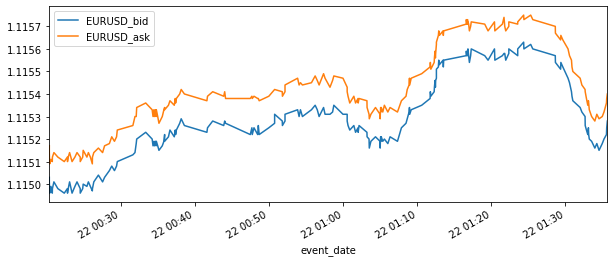

In [0]:
EUR_USD[["EURUSD_bid", "EURUSD_ask"]].iloc[100:300].plot(figsize=(10,4))

Describe of the EURUSD currency pair

In [0]:
EUR_USD[["EURUSD_bid", "EURUSD_ask", "closeout_bid", "closeout_bid"]].describe()

,EURUSD_bid,EURUSD_ask,closeout_bid,closeout_bid
count,96705.000000,96705.000000,96705.000000,96705.000000
mean,1.106644,1.106768,1.106494,1.106494
std,0.005259,0.005260,0.005259,0.005259
min,1.098850,1.098970,1.098700,1.098700
25%,1.101780,1.101900,1.101630,1.101630
50%,1.105290,1.105420,1.105140,1.105140
75%,1.112140,1.112270,1.111990,1.111990
max,1.116210,1.116350,1.116060,1.116060


It seems that distribution of the received data is not steady -> need to aggregate it

In [0]:
Test = EUR_USD[["EURUSD_bid", "EURUSD_ask", "closeout_bid", "closeout_bid"]].groupby(pd.Grouper(freq='min')).count()
Test[Test["EURUSD_bid"]>0]

,EURUSD_bid,EURUSD_ask,closeout_bid,closeout_bid
event_date,,,,
2019-10-21 22:16:00,5,5,5,5
2019-10-21 22:18:00,1,1,1,1
2019-10-21 23:04:00,1,1,1,1
2019-10-21 23:05:00,1,1,1,1
2019-10-21 23:06:00,5,5,5,5
...,...,...,...,...
2019-11-18 17:23:00,4,4,4,4
2019-11-18 17:24:00,4,4,4,4
2019-11-18 17:25:00,4,4,4,4


# Creating time slices

Example for slices

In [0]:
EUR_USD.groupby(pd.Grouper(freq='min')).mean().dropna()

,id,EURUSD_bid,bid_liquidity,EURUSD_ask,closeout_bid,closeout_ask,tradeable,ask_liquidity
event_date,,,,,,,,
2019-10-21 22:16:00,3.00,1.114836,10000000.0,1.114990,1.114686,1.115140,1.0,10000000.0
2019-10-21 22:18:00,6.00,1.114800,10000000.0,1.114970,1.114650,1.115120,1.0,10000000.0
2019-10-21 23:04:00,7.00,1.114900,10000000.0,1.115020,1.114750,1.115170,1.0,10000000.0
2019-10-21 23:05:00,8.00,1.114870,10000000.0,1.115000,1.114720,1.115150,1.0,10000000.0
2019-10-21 23:06:00,11.00,1.114828,10000000.0,1.114956,1.114678,1.115106,1.0,10000000.0
...,...,...,...,...,...,...,...,...
2019-11-18 17:23:00,214022.00,1.107987,10000000.0,1.108102,1.107838,1.108253,1.0,10000000.0
2019-11-18 17:24:00,214030.25,1.107967,10000000.0,1.108085,1.107817,1.108235,1.0,10000000.0
2019-11-18 17:25:00,214038.00,1.107945,10000000.0,1.108062,1.107795,1.108213,1.0,10000000.0


Create it for the hole dataset

In [0]:
df = EUR_USD.groupby(pd.Grouper(freq='30s')).mean().dropna()
df = df.merge(USD_CHF.groupby(pd.Grouper(freq='30s')).mean().dropna(), left_index=True, right_index=True)
df = df.merge(GBP_USD.groupby(pd.Grouper(freq='30s')).mean().dropna(), left_index=True, right_index=True)
df = df.merge(AUD_USD.groupby(pd.Grouper(freq='30s')).mean().dropna(), left_index=True, right_index=True)

## Plot Bid prices

Currencies has correlation with each other. It can be useful to use it as feature

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b089d7ba8>,
      dtype=object)

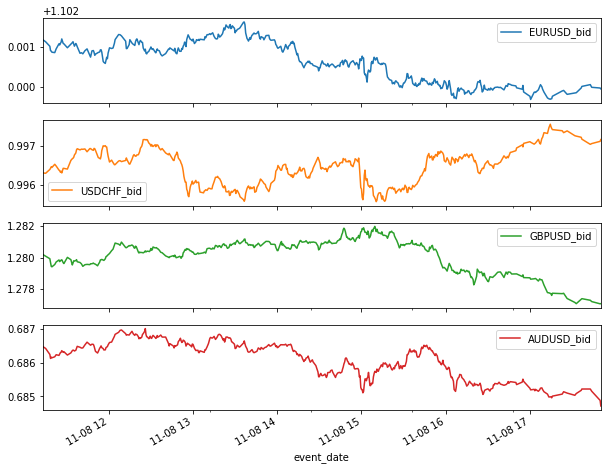

In [0]:
df[["EURUSD_bid", "USDCHF_bid", "GBPUSD_bid", "AUDUSD_bid"]].head(500).plot(subplots=True, figsize=(10,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b088797f0>,
      dtype=object)

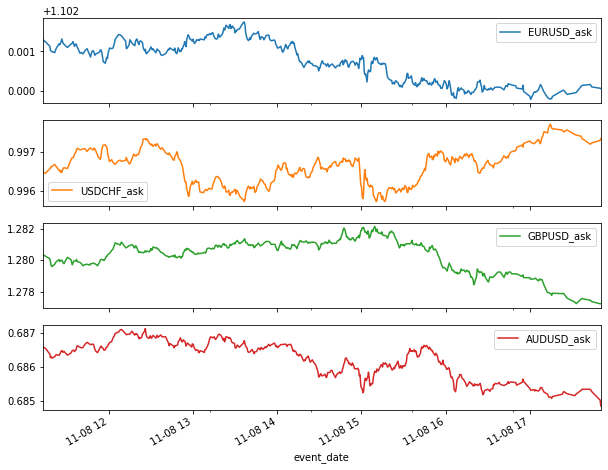

In [0]:
df[["EURUSD_ask", "USDCHF_ask", "GBPUSD_ask", "AUDUSD_ask"]].head(500).plot(subplots=True, figsize=(10,8))

Calculating:
- exponential moving average for 12, 26 days
- MACD
- relative streight index

In [0]:
df["EURUSD_ask_EMA12"] = df["EURUSD_ask"].ewm(span=12,adjust=True).mean()
df["EURUSD_ask_EMA26"] = df["EURUSD_ask"].ewm(span=26,adjust=True).mean()
df["EURUSD_ask_MACD"] = df["EURUSD_ask_EMA12"]-df["EURUSD_ask_EMA26"]

df["EURUSD_bid_EMA12"] = df["EURUSD_bid"].ewm(span=12,adjust=True).mean()
df["EURUSD_bid_EMA26"] = df["EURUSD_bid"].ewm(span=26,adjust=True).mean()
df["EURUSD_bid_MACD"] = df["EURUSD_bid_EMA12"]-df["EURUSD_bid_EMA26"]

Connection between MACD and EMA with the ask prices can be seen on the following figure

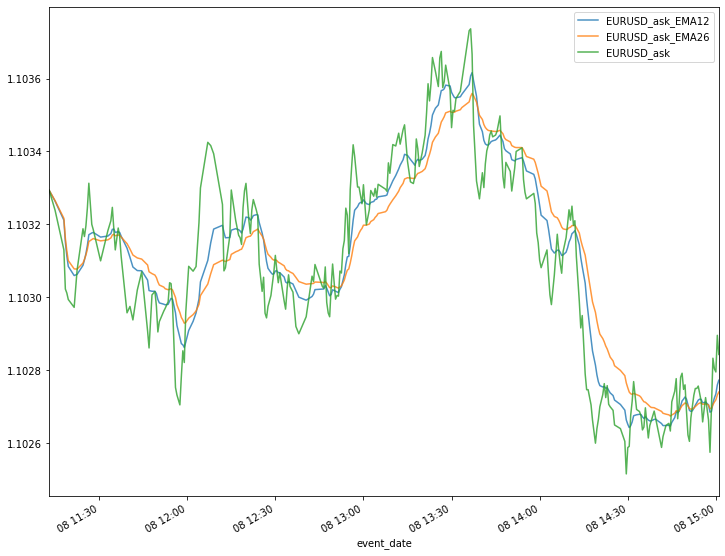

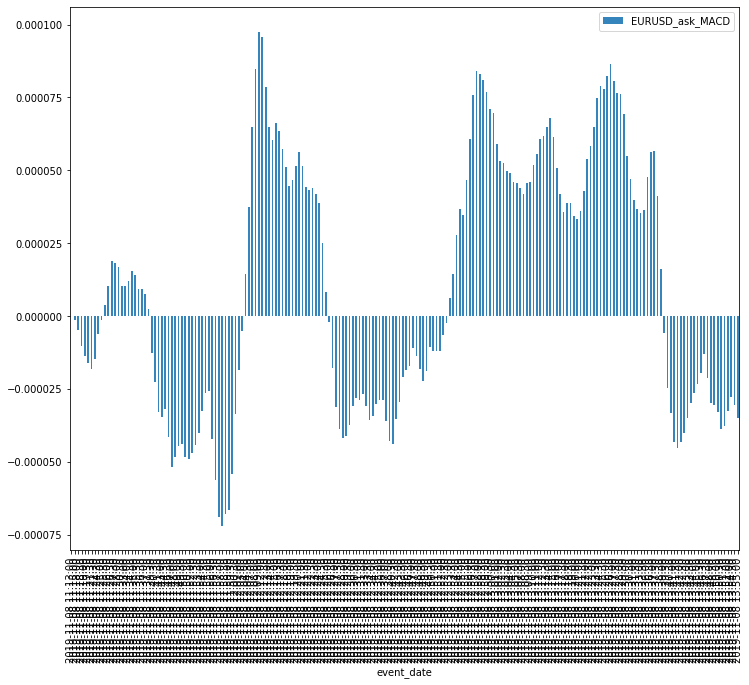

In [0]:
df[["EURUSD_ask_EMA12","EURUSD_ask_EMA26", "EURUSD_ask"]].head(300).plot(alpha=.8, figsize=(12,10))
df[["EURUSD_ask_MACD"]].head(200).plot(alpha=.9, figsize=(12,10),kind="bar")

In [0]:
symbol = "EURUSD_ask"

sma = df[symbol].rolling(window=20).mean()

# calculate the standar deviation
rstd = df[symbol].rolling(window=20).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})

In [0]:
df["EURUSD_ask_BU"] = upper_band
df["EURUSD_ask_BD"] = lower_band

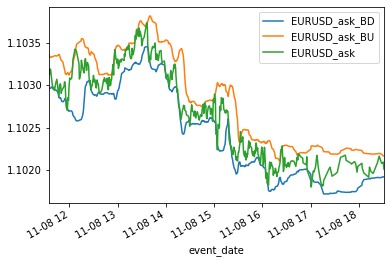

In [0]:
df[["EURUSD_ask_BD", "EURUSD_ask_BU", "EURUSD_ask"]].dropna().head(500).plot()

In [0]:
def relative_strength_index(df, n):
    """Calculate Relative Strength Index(RSI) for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
        DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
    RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    df = df.join(RSI)
    return df

How many null we have

In [0]:
df.isnull().sum().sum()

38

In [0]:
df = df.dropna()

Links:
- https://www.investopedia.com/terms/m/macd.asp
- https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
- https://towardsdatascience.com/technical-analysis-library-to-financial-datasets-with-pandas-python-4b2b390d3543
- https://pypi.org/project/stockstats/
- https://www.investopedia.com/terms/r/rsi.asp

# Creating a model

Creating time window from our stock data
output variable:
- 1 if price moved up more than "limit" percent
- -1 if price moved down more than "limit" percent
- 0 else

In [0]:
def get_timeseries(df, time_steps, output_col_num, limit, predict_interval):
  dim_0 = df.shape[0] - time_steps
  dim_1 = 9
  x = np.zeros((dim_0, time_steps, dim_1))
  y = np.zeros((dim_0,))

  for i in range(dim_0):
    x[i] = df[i:time_steps+i]
    if (df[time_steps+i, output_col_num] - df[time_steps+i-predict_interval, output_col_num] > df[time_steps+i, output_col_num]*limit):
      y[i] = 1
    elif (abs(df[time_steps+i, output_col_num] - df[time_steps+i-predict_interval, output_col_num]) < df[time_steps+i, output_col_num]*limit):
      y[i] = 0
    else:
      y[i] = -1
  return x, y
  
def trim_dataset(df, batch_size):
    no_of_rows_drop = df.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return df[:-no_of_rows_drop]
    else:
        return df

In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [0]:
scaler = StandardScaler()

batch_size = 64

ask_input_cols = ["EURUSD_ask", "USDCHF_ask", "GBPUSD_ask", "AUDUSD_ask", "EURUSD_ask_EMA12", 	"EURUSD_ask_EMA26", 	"EURUSD_ask_MACD", 	"EURUSD_ask_BU", 	"EURUSD_ask_BD" ]
ask_output_col_num = 3 #eur_usd_ask

ask_stock_train, ask_stock_test = train_test_split(df, train_size = 0.8, test_size = 0.2, shuffle = False)

ask_stock_x = ask_stock_train.loc[:, ask_input_cols].values

ask_stock_x_train = scaler.fit_transform(ask_stock_x)
ask_stock_x_test = scaler.transform(ask_stock_test.loc[:, ask_input_cols].values)

ask_stock_x_train, ask_stock_y_train = get_timeseries(ask_stock_x_train, 120, ask_output_col_num, 0.05, 10)
ask_stock_x_train = trim_dataset(ask_stock_x_train, batch_size)
ask_stock_y_train = trim_dataset(ask_stock_y_train, batch_size)

ask_stock_x_val_test, ask_stock_y_val_test = get_timeseries(ask_stock_x_test, 120, ask_output_col_num, 0.05, 10)
ask_stock_x_val, ask_stock_x_test = np.split(trim_dataset(ask_stock_x_val_test, batch_size),2)
ask_stock_y_val, ask_stock_y_test = np.split(trim_dataset(ask_stock_y_val_test, batch_size),2)

ask_stock_y_train = np_utils.to_categorical(ask_stock_y_train, 3)
ask_stock_y_val = np_utils.to_categorical(ask_stock_y_val, 3)
ask_stock_y_test = np_utils.to_categorical(ask_stock_y_test, 3)

ask_stock_y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

Our first model contains three LSTM layers, and a Dense one, to make the classification. We've used early stopping, checkpointing, and logging so far.


In [0]:
ask_checkpointer = ModelCheckpoint(filepath='ask_weights.hdf5', save_best_only = True)
early_stopping=EarlyStopping(patience=8, verbose=1)

ask_logger = CSVLogger('ask_training_log.csv',separator=',', append= True)

ask_model = Sequential()
ask_model.add(LSTM(128, input_shape=(ask_stock_x_train.shape[-2], ask_stock_x_train.shape[-1]), return_sequences=True))
ask_model.add(LSTM(128, return_sequences=True))
ask_model.add(LSTM(128))
ask_model.add(Dense(3, activation='softmax'))


optimizer = RMSprop(lr = 0.001)
ask_model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
ask_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 120, 128)          70656     
_________________________________________________________________
lstm_5 (LSTM)                (None, 120, 128)          131584    
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 334,211
Trainable params: 334,211
Non-trainable params: 0
_________________________________________________________________


In [0]:
ask_model.fit(ask_stock_x_train,
          ask_stock_y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data = (ask_stock_x_val,ask_stock_y_val),
          callbacks = [ask_checkpointer, early_stopping, ask_logger])

Train on 4736 samples, validate on 544 samples
Epoch 1/20
4736/4736 [==============================] - 58s 12ms/step - loss: 0.8884 - acc: 0.5351 - val_loss: 0.5845 - val_acc: 0.7518
Epoch 2/20
4736/4736 [==============================] - 55s 12ms/step - loss: 0.8462 - acc: 0.5743 - val_loss: 0.6389 - val_acc: 0.7518
Epoch 3/20
4736/4736 [==============================] - 56s 12ms/step - loss: 0.8135 - acc: 0.6009 - val_loss: 0.5569 - val_acc: 0.7518
Epoch 4/20
4736/4736 [==============================] - 56s 12ms/step - loss: 0.7638 - acc: 0.6320 - val_loss: 0.5662 - val_acc: 0.7408
Epoch 5/20
4736/4736 [==============================] - 56s 12ms/step - loss: 0.7157 - acc: 0.6641 - val_loss: 0.4932 - val_acc: 0.7812
Epoch 6/20
1280/4736 [=======>......................] - ETA: 39s - loss: 0.6893 - acc: 0.6781

Our accuracy is not so great right now, but we hope to achieve more.

In [0]:
from keras.models import load_model


ask_model = load_model('ask_weights.hdf5')

ask_model.evaluate(ask_stock_x_test, ask_stock_y_test)

We made another identical model that gets the bid prices, and its technical indiators as inputs, and predicts the bid price of the next datapoint. The goal is to plan a trading strategy based on the difference of predicted bid and ask prices.

In [0]:
bid_input_cols = ["EURUSD_bid", "USDCHF_bid", "GBPUSD_bid", "AUDUSD_bid", "EURUSD_bid_EMA12", 	"EURUSD_bid_EMA26", 	"EURUSD_bid_MACD", 	"EURUSD_bid_BU", 	"EURUSD_bid_BD" ]
bid_output_col_num = 1 #eur_usd_bid

bid_stock_train, bid_stock_test = train_test_split(df, train_size = 0.8, test_size = 0.2, shuffle = False)

bid_stock_x = bid_stock_train.loc[:, bid_input_cols].values

bid_stock_x_train = scaler.fit_transform(bid_stock_x)
bid_stock_x_test = scaler.transform(bid_stock_test.loc[:, bid_input_cols].values)

bid_stock_x_train, bid_stock_y_train = get_timeseries(bid_stock_x_train, 120, bid_output_col_num, 0.05, 10)
bid_stock_x_train = trim_dataset(bid_stock_x_train, batch_size)
bid_stock_y_train = trim_dataset(bid_stock_y_train, batch_size)

bid_stock_x_val_test, bid_stock_y_val_test = get_timeseries(bid_stock_x_test, 120, bid_output_col_num, 0.05, 10)
bid_stock_x_val, bid_stock_x_test = np.split(trim_dataset(bid_stock_x_val_test, batch_size),2)
bid_stock_y_val, bid_stock_y_test = np.split(trim_dataset(bid_stock_y_val_test, batch_size),2)

bid_stock_y_train = np_utils.to_categorical(bid_stock_y_train, 3)
bid_stock_y_val = np_utils.to_categorical(bid_stock_y_val, 3)
bid_stock_y_test = np_utils.to_categorical(bid_stock_y_test, 3)

In [0]:
bid_logger = CSVLogger('bid_training_log.csv',separator=',', append= True)
bid_checkpointer = ModelCheckpoint(filepath='bid_weights.hdf5', save_best_only = True)

bid_model = Sequential()
bid_model.add(LSTM(128, input_shape=(stock_x_train.shape[-2], stock_x_train.shape[-1]), return_sequences=True))
bid_model.add(LSTM(128, return_sequences=True))
bid_model.add(LSTM(128))
bid_model.add(Dense(3, activation='softmax'))

bid_model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [0]:
bid_model.fit(bid_stock_x_train,
          bid_stock_y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data = (bid_stock_x_val,bid_stock_y_val),
          callbacks = [bid_checkpointer, early_stopping, bid_logger])

In [0]:
bid_model = load_model('bid_weights.hdf5')

bid_model.evaluate(bid_stock_x_test, bid_stock_y_test)